###### *Predicting price of pre-owned cars*

In [1]:
import pandas as pd     #to work with dataframes
import numpy as np      #to peform numeric operation
import seaborn as sns

In [2]:
## Setting dimensions for plot
sns.set(rc={"figure.figsize":(11.7,8.27)})

In [3]:
## Reading CS file
cars_data = pd.read_csv("cars_sampled.csv")
cars_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
# creating a deep copy i.e any changes made in cars will not be reflected back to cars_data
cars = cars_data.copy()

In [5]:
# Structure of the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

*We can see that there is 5001 entries with 19 columns*

*And there are some missing value in vehicleType,gearbox,model,fuelType* 

In [6]:
# summarizing the data i.e summary of numerical variable
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
# to dislplay to three decimal place float value
pd.set_option("display.float_format",lambda x: "%.3f" % x)  
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [8]:
# To display maximum set of columns
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


*There is a huge difference between the mean and median of "Price" variable. That means price is very very skewed*

In [9]:
# Dropping unwanted columns
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis=1)

*We have dropped 5 columns here*

In [10]:
# Removing the duplicate records. Keeping first occurences of the record
cars.drop_duplicates(keep = 'first', inplace = True)
cars.shape

(49531, 14)

*There are (50001 - 49531) = 470 duplicate records*

##### Data Cleaning

In [11]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

*Here,we can see that  'vehicleType','gearbox', 'model','fuelType','notRepairedDamage' have 5152,2765,2730,4467,9640 missing values respectively*

In [12]:
# Variable yearOfRegistration
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [13]:
print(sum(cars['yearOfRegistration']>2018))
sum(cars['yearOfRegistration']<1950)

26


38

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

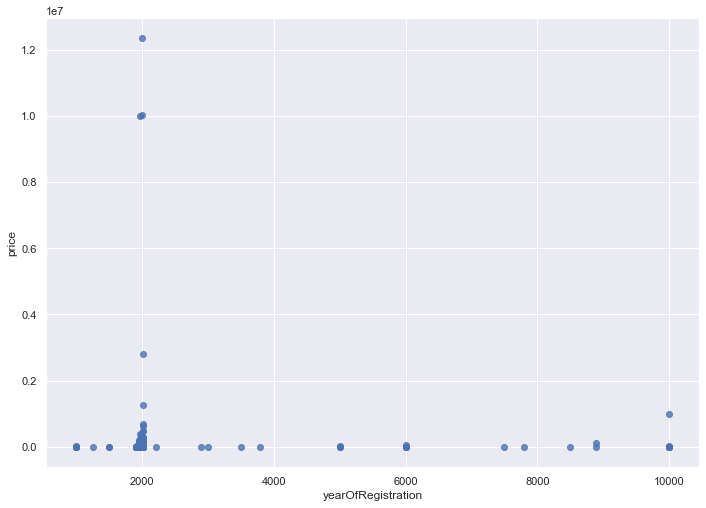

In [14]:
sns.regplot(x = 'yearOfRegistration',y = "price", scatter = True,fit_reg = False, data = cars)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

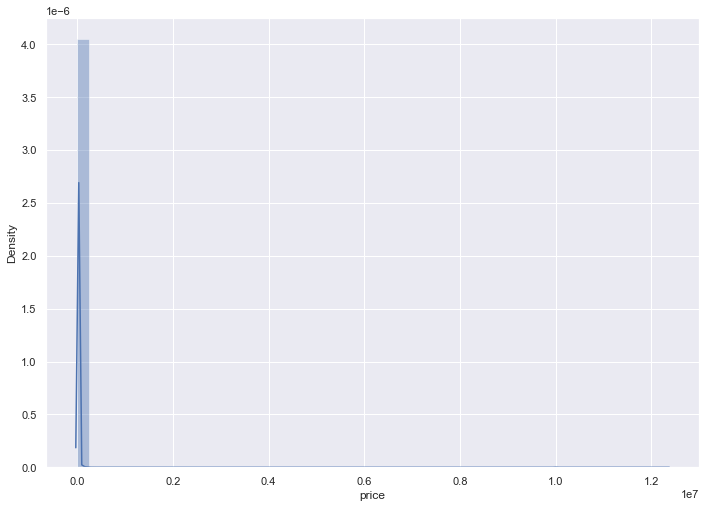

In [15]:
# Variable price
price_count = cars['price'].value_counts().sort_index()
price_count
sns.distplot(cars['price'])

In [16]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

Mean = 6567.220 and median = 2950.000. There is huge difference and this itself accounts for the skewness in the data. 
The min value is 0 and max value is really very high so range is really very wide and we have to marrow it down to come up with the generalised model 

0        False
1        False
2        False
3        False
4        False
         ...  
49996    False
49997    False
49998    False
49999    False
50000    False
Name: price, Length: 49531, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
49996     True
49997    False
49998     True
49999    False
50000    False
Name: price, Length: 49531, dtype: bool


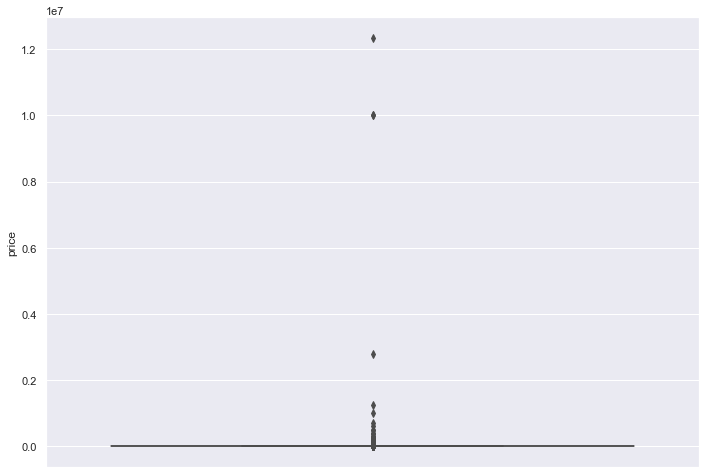

In [17]:
sns.boxplot(y=cars['price'])
print(cars['price']>150000)    #:: 34
print(cars['price']<100)       #:: 1748

Boxplot tells us there are some outliers here. Infact, we cannot see the box, now this tells us that there are considerable outliers in our data which are very very extreme in nature and hence we are not able to see the behaviour of the variable

Working range - 100 and 150000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

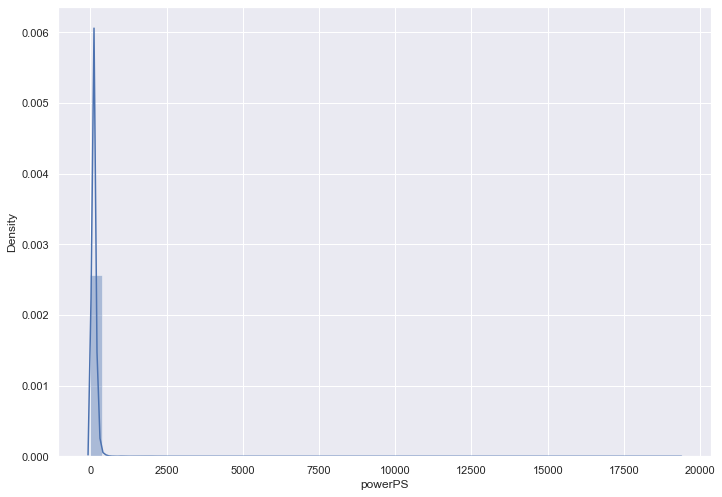

In [18]:
# Variable powerPS
price_count = cars['powerPS'].value_counts().sort_index()
price_count
sns.distplot(cars['powerPS'])

In [19]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

*Though the mean and standard deviation is not far away the standard deviation is quite huge.*

0        False
1        False
2        False
3        False
4        False
         ...  
49996    False
49997    False
49998    False
49999    False
50000    False
Name: powerPS, Length: 49531, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
49996     True
49997     True
49998     True
49999     True
50000    False
Name: powerPS, Length: 49531, dtype: bool


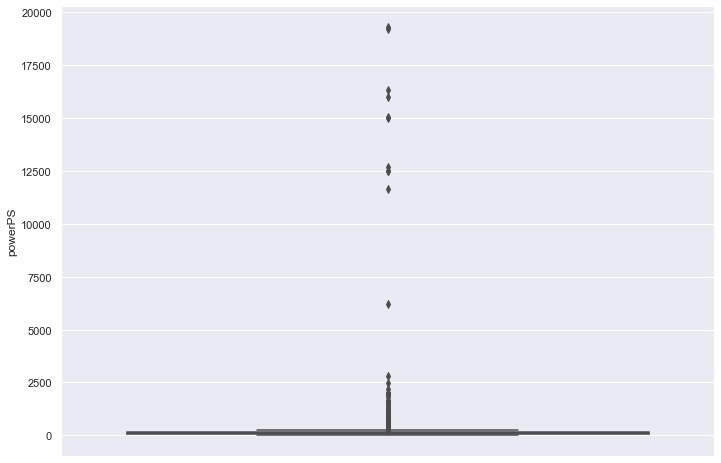

In [20]:
sns.boxplot(y=cars['powerPS'])
print(cars['powerPS']>500)    #:: 115
print(cars['powerPS']<10)     #  :: 5565

There are some extreme values here that are compressing the box. So we deal with this by taking workable range of data

Working Range - 10 and 500

In [21]:
# Woring range of data

cars = cars[
    (cars.yearOfRegistration <= 2018)
    & (cars.yearOfRegistration >= 1950)
    & (cars.price >= 100)
    & (cars.price <= 150000)
    & (cars.powerPS >= 10)
    & (cars.powerPS <= 500)
]

In [22]:
cars.shape

(42772, 14)

(49531 - 42772) = 6759 records are dropped

In [23]:
# Further to simplify - variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12


To get rid of 0 we try to divide each of the entries by 12 in column monthOfRegistration. 

In [24]:
cars.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no


In [25]:
# Creating a new variable Age by adding yearOfRegistration and monthOfRegistration
cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

*The mean and the median are not very far-off. Now the data is not very skewed.*

In [26]:
# Dropping yearOf andRegistration and monthOfRegistration
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

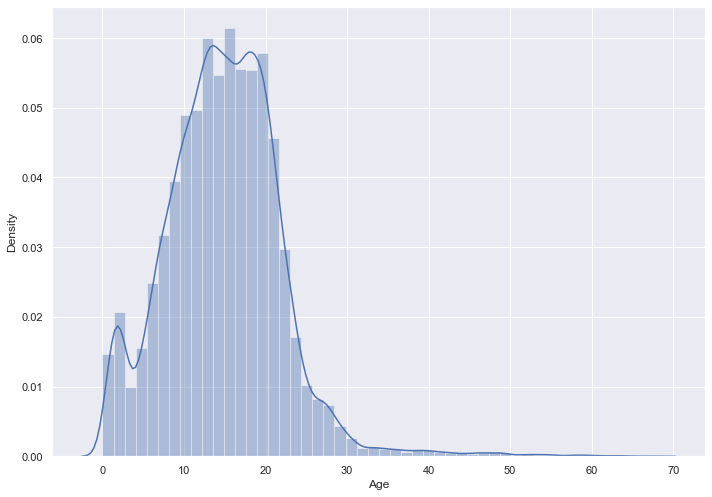

In [27]:
# Visualizing parameters
sns.distplot(cars['Age'])


<AxesSubplot:ylabel='Age'>

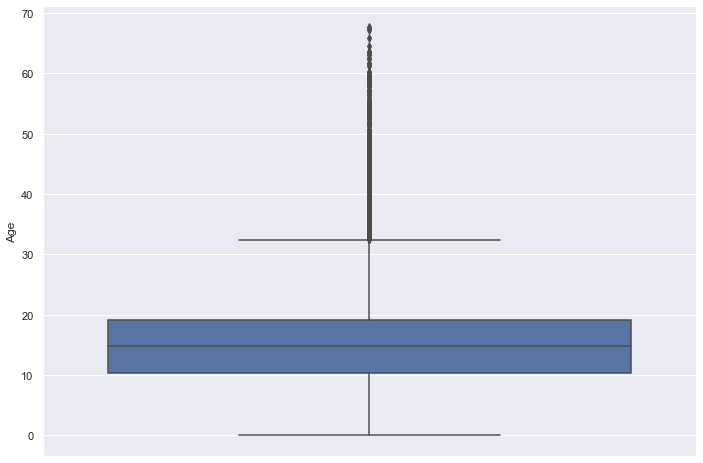

In [28]:
sns.boxplot(y=cars['Age'])

Now we can see ,above the whiskers ther are few extreme values or outliers which was not possible in earlier case

In [29]:
# price
# sns.distplot(cars['price'])
# sns.boxplot(y=cars['price'])

In [30]:
# powerPS
# sns.distplot(cars['powerPS'])
# sns.boxplot(y=cars['powerPS'])

The histogram for price is now better than earlier.Moreover, the density curve is also being fit here and we can see more ranges to the powerPS

In [31]:
# Visualising parameters after narrowing working range
# Age Vs price
# sns.regplot(x ='Age',y ='price',scatter = True,fit_reg = False,data = cars)

Its a scatter plot. Earlier when we plot all these values where bunched uptogether in one end and we could not really see a clear cut effect of Age on price.

Cars which are priced higher are fairly newer. But there are cars which are priced a little higher and are still older so we can treat them as vintage. A general note that with increase in age the price also drops

In [32]:
# powerPS with price
# sns.regplot(x ='powerPS',y ='price',scatter = True,fit_reg = False,data = cars)

With increase in power the price eventually increases. Since now we are working with narrow range of values , we can see the effect of powerPS on price

Now we are going to check the effect of other variables on price. But before that we need to narrow down the variables , mostly the categorical variables to check if ther are enough count to even retain them.

In [33]:
# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize = True)
# sns.countplot(x='seller',data=cars)

col_0,count
seller,
commercial,0.000
private,1.000


The seller variable has two categries private and commercial, but commertial has ony one observation so we are going to drop it

Fewer cars have 'commercial' .==> Insignificant

In [34]:
# Variable offertype

cars['offerType'].value_counts()
pd.crosstab(cars['offerType'],columns='count',normalize = True)
# sns.countplot(x='offerType',data=cars)

col_0,count
offerType,
offer,1.000


All cars have offer. ==> insignificant

In [35]:
# Variable abtest

cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize = True)
# sns.countplot(x='abtest',data=cars)

col_0,count
abtest,
control,0.483
test,0.517


There is almost equal split between the categorize test and control. Roughly 51% is under test and 48% is under control

<AxesSubplot:xlabel='abtest', ylabel='price'>

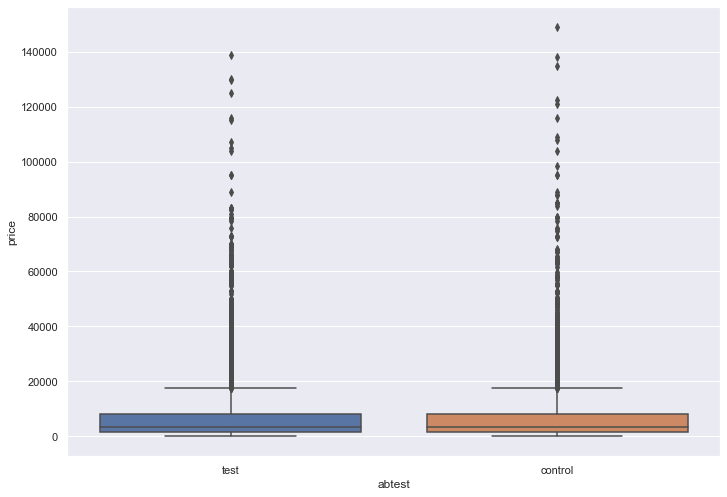

In [36]:
sns.boxplot(x='abtest',y='price',data=cars)

Seeing effect on price. So even in boxplot the effects seems to be more or less the same. We can't really infer anything

For every price value ther is almost 50-50 distribution

Does not affect price ==> Insignificant

In [37]:
# Variable vehicleType

cars['vehicleType'].value_counts()
# pd.crosstab(cars['vehicleType'],columns='count',normalize = True)
# sns.countplot(x='vehicleType',data=cars)

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

Limouse is highest with 29%. Limouse is countributing the most followed by small car, station wagon, bus. 

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

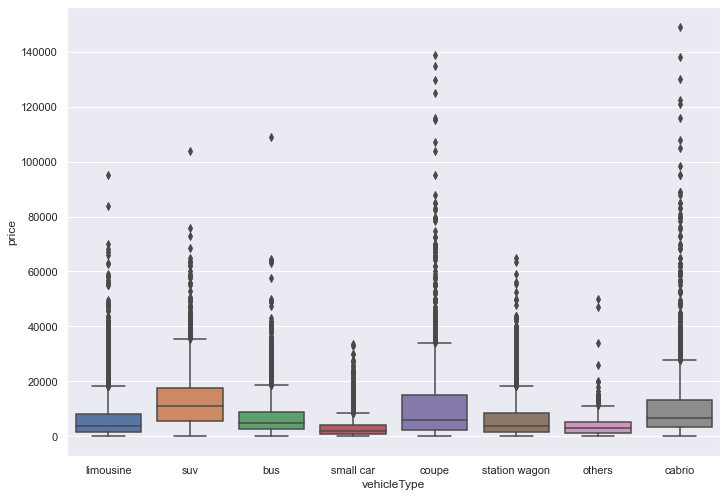

In [38]:
sns.boxplot(x='vehicleType',y='price',data=cars)

For different categories there are differnt price ranges. Vehicle type does effect price and we are going to retain it in our model

There 8 types - (Limouse,small car, station wagon) have the max freq

<AxesSubplot:xlabel='gearbox', ylabel='price'>

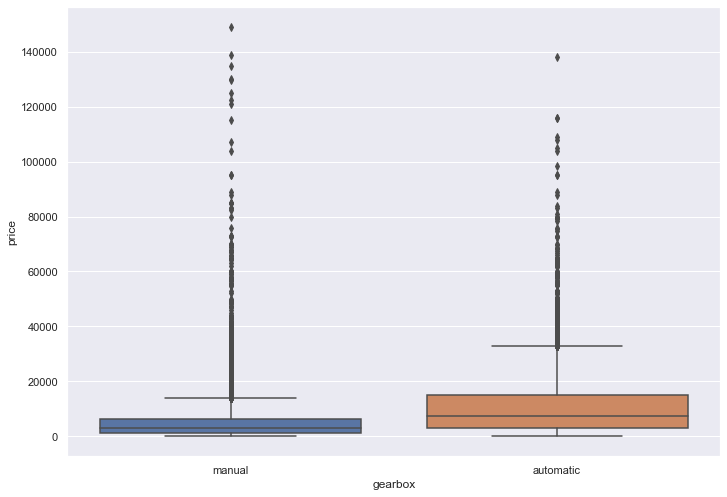

In [39]:
# Variable gearbox

cars['gearbox'].value_counts()
# pd.crosstab(cars['vehicleType'],columns='count',normalize = True)
# sns.countplot(x='vehicleType',data=cars)
sns.boxplot(x='gearbox',y = 'price',data=cars)

Gearbox affects price. Because manual is price lower than automatic and thats evident from the boxplot itself

<AxesSubplot:xlabel='model', ylabel='price'>

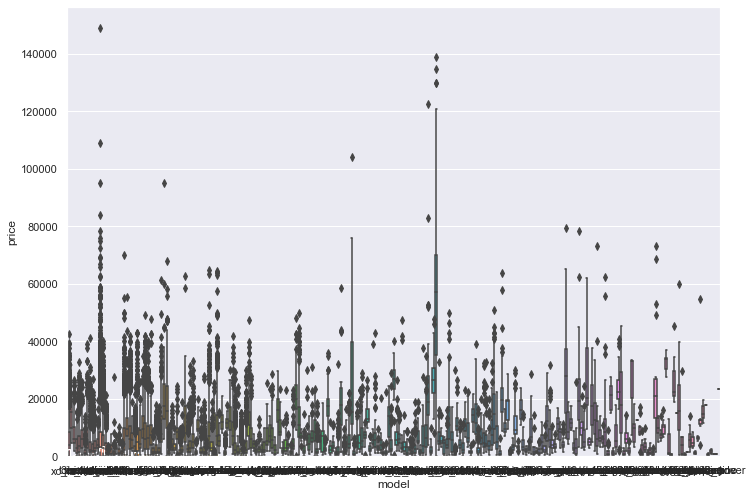

In [40]:
# Variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize = True)
sns.countplot(x='model',data=cars)
sns.boxplot(x='model',y = 'price',data=cars)

Cars are distributed over many models.

Considered in modelling

<AxesSubplot:xlabel='kilometer', ylabel='price'>

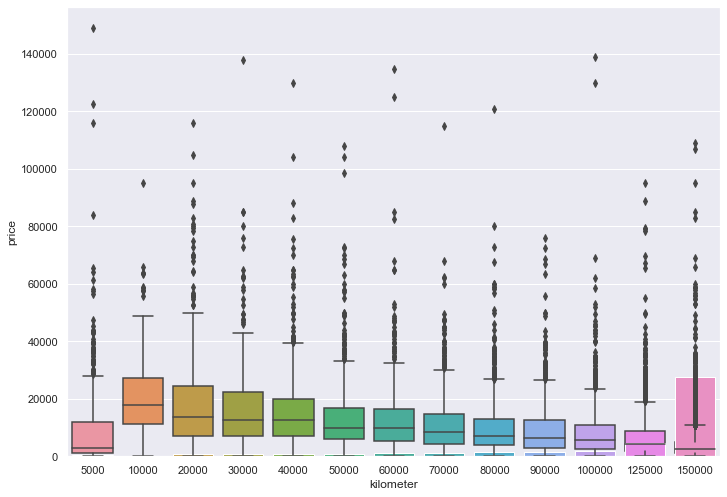

In [41]:
# Variable kilometer

cars['kilometer'].value_counts()
pd.crosstab(cars['kilometer'],columns='count',normalize = True)
sns.countplot(x='kilometer',data=cars)
sns.boxplot(x='kilometer',y = 'price',data=cars)

Different kilometer affects the price in different way.Cars that has travelled lower kilometer like 10000 and 20000 are sold for much higher price. Whereas car which have travelled lot of kilometer their price drops.Except for the 5000km where the price is less

Considered in modelling

<AxesSubplot:xlabel='fuelType', ylabel='price'>

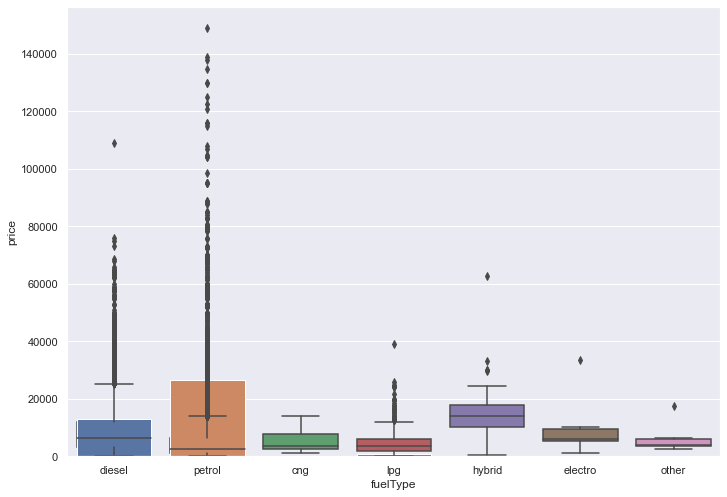

In [42]:
# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize = True)
sns.countplot(x='fuelType',data=cars)
sns.boxplot(x='fuelType',y = 'price',data=cars)

Petrol is contributing the maximum followed by diesel and LPG.

fuelType affects price

<AxesSubplot:xlabel='brand', ylabel='count'>

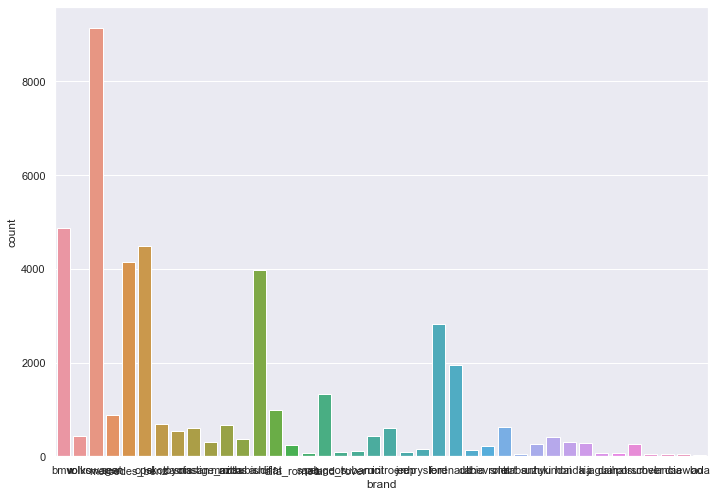

In [43]:
# Variable brand

cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize = True)
sns.countplot(x='brand',data=cars)
# sns.boxplot(x='brand',y = 'price',data=cars)

Cars are distributed over many models

Considered for modelling

<AxesSubplot:xlabel='notRepairedDamage', ylabel='count'>

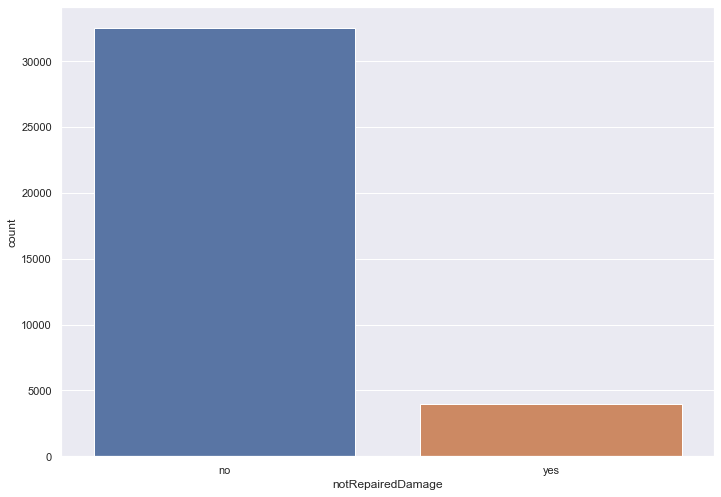

In [44]:
# Variable notRepairedDamage
# yes - car is damaged but not rectified
# noCar - car was damaged but has been rectified

cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize = True)
sns.countplot(x='notRepairedDamage',data=cars)
# sns.boxplot(x='brand',y = 'price',data=cars)

Cars where the damaged has not been looked after are being sold for the lower price range compare to the cars where the damage has been rectified

In [45]:
# Removing insignificant variables

col = ['seller','offerType','abtest']
cars = cars.drop(columns=col, axis = 1)
cars_copy = cars.copy()
cars_copy.shape

(42772, 10)

In [46]:
cars_copy.shape

(42772, 10)

In [47]:
# Correlation in numerical variables

cars_select1 = cars.select_dtypes(exclude=[object])
correlation = cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

Except for powerPS the other two variable do not have the heavy influence on price. Even the powerPS is not strongly correlated to price

*We are goind to build a Linear Regression and Random Forest Model on two sets of data.*
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values

In [48]:
# OMITTING MISSING VALUE
cars_omit = cars.dropna(axis=0)

In [49]:
cars.shape

(42772, 10)

In [50]:
cars_omit.shape

(32884, 10)

So, by omitting the missing values we dropped around (42772-32884) =9888 .approx 10000 observations

In [51]:
# Converting categorical variavle to dummy variable
cars_omit = pd.get_dummies(cars_omit, drop_first = True)

We have column that are categorical in nature for instance vehicleType, gearbox, model. The values under these columns are string in nature and none of the ML algorithms under scikit learn except columns which are string in nature. So, we dummy encode these categorical columns and we generate newer column out of it. For fueltype we have 4 catogories so we generate (4-1) columns. Te value under each of thes column will be '0'(not present) or '1'(present)

In [52]:
cars_omit.shape

(32884, 301)

We started with 10 and now has 301 columns. Because we have several categories under each column.

In [53]:
# Importing the necessary library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
# modelled building with omitted data

In [55]:
# Seperating input and output features
x1 = cars_omit.drop(['price'],axis='columns',inplace=False)
y1 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

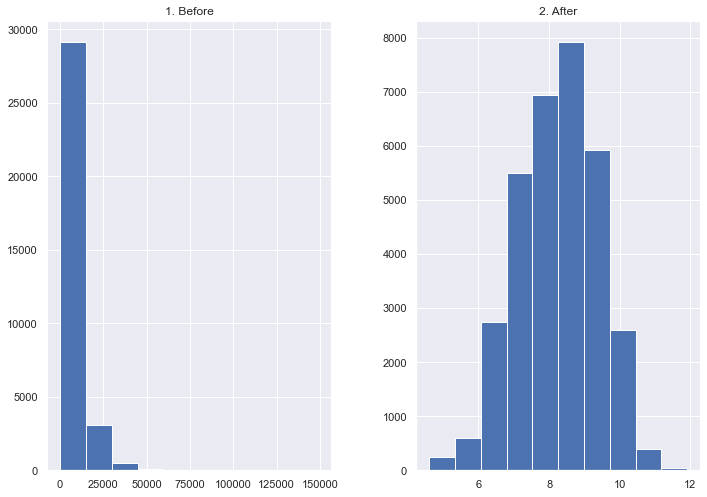

In [56]:
# Plotting the variable price
prices = pd.DataFrame({'1. Before':y1,'2. After': np.log(y1)})
prices.hist()

We get a nice bell-shaped curve when we convert y to log(y). In left we have plot just the price and on the right we have plot logarithmic of price. We are going to use log of price as input features

In [57]:
y1 = np.log(y1)

y1 is transformed because the range of price is very huge to avoid this we take the log

In [58]:
# Splitting the data into test and train 

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [59]:
print(23018/32884)
(9866/32884 )   

# We can infer the test train split ratio based on the no. of obs.

0.6999756720593602


0.3000243279406398

In [60]:
# baseline model for predicted data

We are making a base model by using test data mean value. This to set a benchmark and to compare with our regression model

In [61]:
# Finding the mean for test data value
base_pred = np.mean(y_test)
base_pred

8.249615787653337

In [62]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test))

In [63]:
# Finding the RMSE( root mean square error)
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.1274483657478247


RMSE(root mean square error) its the sq. root of the mean squared error. It computes the differemce between rhe test value and the predicted value, square them and divide them by no.of sample i.e mean squared error

In [64]:
## Linear Regression with omitted data

# Splitting the intercept as true
lgr = LinearRegression(fit_intercept = True)

In [65]:
# Model
model_lin1 = lgr.fit(X_train,y_train)

In [66]:
# Predicting model on test set
cars_prediction_lin1 = lgr.predict(X_test)

In [67]:
# Compute MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_prediction_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513836


In [68]:
# R squared value
r2_lin_test1 = model_lin1.score(X_test,y_test)
r2_lin_train1 = model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649247 0.7800936978183916


R square value - tells how good our model is able to explain the variabiity in 'y'
1. Train set rsq. is 0.780
2. Test set rsq is 0.7658

Train set seems to definitely better and the test is not far behind. It's a close cut. So this tells us that the model is good. The train and test almost compute the same variability

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

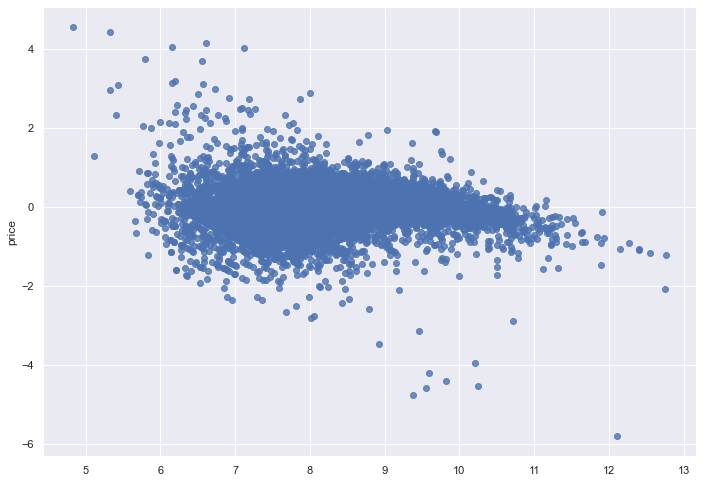

In [69]:
# Regression diagnostics - Resdual plot analysis
residuals1 = y_test-cars_prediction_lin1
sns.regplot(x=cars_prediction_lin1, y=residuals1, scatter = True, fit_reg =False, data = cars)
residuals1.describe()

We wanted the residuals to be close to zero. Since residuals are more of errors we want error to be less and that tells that our predicted and actual values are very very closer. We can alse see this by decribe function , mean of the data is around 0.003 that is vary approx 0 and this itself is a good indicator that our predicted and the actual value is very very close

#### Random Forest with Omitted data

In [70]:
# Model Parameters
rf = RandomForestRegressor(n_estimators = 100, max_features ='auto',
                           max_depth = 100, min_samples_split = 10,min_samples_leaf = 4, random_state=1)

In [71]:
# Model 
model_rf1 = rf.fit(X_train,y_train)

In [72]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [73]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_mse1,rf_rmse1)

0.19016020985430382 0.4360736289370223


Random Forest is performing better than linear regression model because the RMSE has come dowm further

In [74]:
# R squared value
r2_rf_test1 = model_rf1.score(X_test,y_test)
r2_rf_train1 = model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


Random Foest model is working a lot better compared to the linear regression model atleast for the omitted data

In [75]:
# Modeled building with imputed data

cars_imputed = cars.apply(lambda x:x.fillna(x.median())
                         if x.dtype == 'float' else
                         x.fillna(x.value_counts().index[0]))

In [76]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [77]:
# Converting categorical variable to dummy variables
cars_imputed = pd.get_dummies(cars_imputed,drop_first = True)

In [78]:
cars_imputed.shape

(42772, 304)

In [79]:
# Modeled building with imputed data

In [80]:
# Seperating input and output features
x2 = cars_omit.drop(['price'],axis='columns',inplace=False)
y2 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

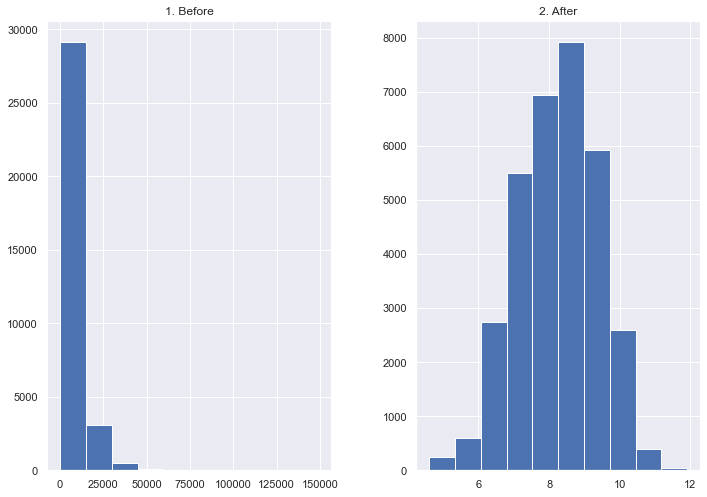

In [81]:
# Plotting the variable price
prices = pd.DataFrame({'1. Before':y2,'2. After': np.log(y2)})
prices.hist()

Again value of price is normally distributed same. All are predictions are goin to be for the log transformed value of prive

In [82]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [83]:
# Splitting the data into test and train 

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [84]:
# baseline model for predicted data

We are making a base model by using test data mean value. this to set a benchmark and to compare with our regression model

In [85]:
# Finding the mean for test data value
base_pred = np.mean(y_test1)
base_pred

8.249615787653337

In [86]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred,len(y_test1))

In [99]:
# Finding the RMSE( root mean square error)
base_root_mean_square_error1 = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error1)

1.1274483657478247


###### Linear Regression with imputed model 

In [88]:
# Setting intercept as true
lgr2 = LinearRegression(fit_intercept = True)

In [89]:
# Model
model_lin2 = lgr2.fit(X_train1,y_train1)

In [90]:
# Predicting the model on the test set
cars_prediction_lin2 = lgr2.predict(X_test1)

In [91]:
# Compute MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_prediction_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.5455481266513836


In [92]:
# R squared value
r2_lin_test2 = model_rf1.score(X_test1,y_test1)
r2_lin_train2 = model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.8504018147750623 0.7800936978183916


In [93]:
# Random Forest with imputed model
# Model Parameters
rf2 = RandomForestRegressor(n_estimators = 100, max_features ='auto',
                           max_depth = 100, min_samples_split = 10,min_samples_leaf = 4, random_state=1)

In [94]:
# Model 
model_rf2 = rf2.fit(X_train1,y_train1)

In [95]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [96]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_mse2,rf_rmse2)

0.19016020985430382 0.4360736289370223


In [97]:
# R squared value
r2_rf_test2 = model_rf2.score(X_test1,y_test1)
r2_rf_train2 = model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8504018147750623 0.9202494705146291


R squared value for the random forest regression model after imputing comes out to be 0.85 for the test set and it's 0.92 for train set. This is a good R-squared model compared to the LR model   

In [98]:
# Final Output :

In [100]:
print("Metrics for models built from data where missing values are ommited")
print("R-squared value for the train from Linear Regression %s"% r2_lin_train1)
print("R-squared value for the test from Linear Regression %s"% r2_lin_test1)

print("R-squared value for the train from Random Forest %s"% r2_rf_train1)
print("R-squared value for the test from Random Forest %s"% r2_rf_test1)

print("Base RMSE of model built frome data where missing values where omitted= %s"% base_root_mean_square_error)
print("RMSE value for test from Linear Regression %s"% lin_rmse1)
print("RMSE value for test from Random Forest %s"% rf_rmse1)

print("\n\n")

print("Metrics for models built from data where missing values are imputed")
print("R-squared value for the train from Linear Regression %s"% r2_lin_train2)
print("R-squared value for the test from Linear Regression %s"% r2_lin_test2)

print("R-squared value for the train from Random Forest %s"% r2_rf_train2)
print("R-squared value for the test from Random Forest %s"% r2_rf_test2)

print("Base RMSE of model built frome data where missing values where imputed= %s"% base_root_mean_square_error1)
print("RMSE value for test from Linear Regression %s"% lin_rmse2)
print("RMSE value for test from Random Forest %s"% rf_rmse2)

Metrics for models built from data where missing values are ommited
R-squared value for the train from Linear Regression 0.7800936978183916
R-squared value for the test from Linear Regression 0.7658615091649247
R-squared value for the train from Random Forest 0.9202494705146291
R-squared value for the test from Random Forest 0.8504018147750623
Base RMSE of model built frome data where missing values where omitted= 1.1274483657478247
RMSE value for test from Linear Regression 0.5455481266513836
RMSE value for test from Random Forest 0.4360736289370223



Metrics for models built from data where missing values are imputed
R-squared value for the train from Linear Regression 0.7800936978183916
R-squared value for the test from Linear Regression 0.8504018147750623
R-squared value for the train from Random Forest 0.9202494705146291
R-squared value for the test from Random Forest 0.8504018147750623
Base RMSE of model built frome data where missing values where imputed= 1.1274483657478247
RMS